In [79]:
import zipfile
import os

zip_path = "/content/Corn (Maize).zip"
extract_path = "/content/dataset/lab3_db"

# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed")

Extraction completed


In [80]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [82]:
# Define paths to train, validation, and test folders
base_dir = r"/content/dataset/lab3_db/Corn (Maize)"
train_dir = f"{base_dir}/Train"
val_dir = f"{base_dir}/Val"
test_dir = f"{base_dir}/Test"

In [83]:
# Image Parameters
IMG_SIZE = (224, 224)  # Resize images to match a standard input size
BATCH_SIZE = 32  # Define batch size for training

In [84]:
train_datagen = ImageDataGenerator(rescale=1.0/255)  # Only normalization, no augmentation
val_test_datagen = ImageDataGenerator(rescale=1.0/255)  # Only normalization, no augmentation

In [85]:
# Create Image Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"  # Since you have multiple classes
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

Found 7316 images belonging to 4 classes.
Found 1645 images belonging to 4 classes.
Found 188 images belonging to 4 classes.


In [86]:
print("Class Labels:", train_generator.class_indices)

Class Labels: {'Cercospora Leaf Spot': 0, 'Common Rust': 1, 'Healthy': 2, 'Northern Leaf Blight': 3}


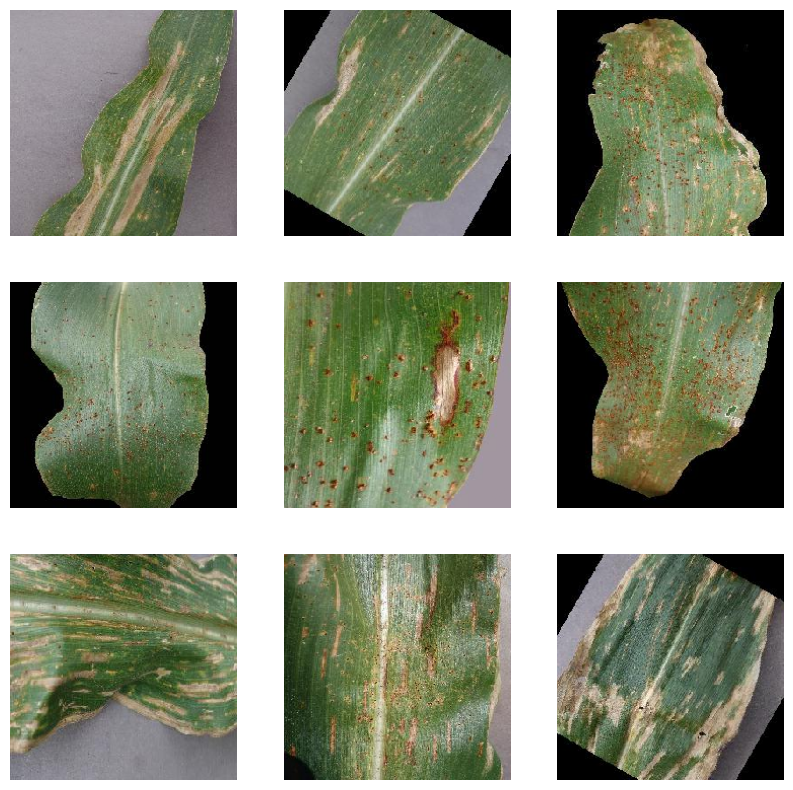

In [87]:
# Function to Visualize Sample Images
def visualize_images(generator):
    images, labels = next(generator)  # Get one batch
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Show 9 images
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.axis("off")
    plt.show()

# Visualize a few training images
visualize_images(train_generator)

In [1]:
def create_model(learning_rate, optimizer):

  model = Sequential([
      Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
      MaxPooling2D(pool_size=(2, 2)),
      Conv2D(64, (3, 3), activation='relu'),
      MaxPooling2D(pool_size=(2, 2)),
      Conv2D(128, (3, 3), activation='relu'),
      MaxPooling2D(pool_size=(2, 2)),
      Flatten(),
      Dense(128, activation='relu'),
      Dropout(0.5),
      Dense(4, activation='softmax')  # 4 classes: "Northern Leaf Blight", "Healthy", "Common Rust", "Cercospora Leaf Spot"
  ])

  if optimizer.lower() == 'adam':
      opt = keras.optimizers.Adam(learning_rate=learning_rate)
  elif optimizer.lower() == 'sgd':
      opt = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
  elif optimizer.lower() == 'rmsprop':
      opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
  else:
      raise ValueError("Unsupported optimizer. Choose from 'adam', 'sgd', or 'rmsprop'.")

  # Compile the model
  model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model


In [91]:
optimizers = ['sgd', 'adam', 'rmsprop']
learning_rates = [0.01, 0.001, 0.0001]

### Training with 5 Epochs

In [ ]:
history_dict = {}
models_dict = {}

for optimizer in optimizers:
    for learning_rate in learning_rates:
        print(f"Training with Optimizer: {optimizer}, Learning Rate: {learning_rate}")

        # Create and train model
        model = create_model(learning_rate, optimizer)
        history = model.fit(train_generator, validation_data = val_generator, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

        # Store results
        models_dict[(optimizer, learning_rate)] = model
        history_dict[(optimizer, learning_rate)] = history.history

        # Print final results
        print(f"Final Training Loss: {history.history['loss'][-1]:.4f}, Accuracy: {history.history['accuracy'][-1]:.4f}")
        print("------------------------------------------------------")


Training with Optimizer: sgd, Learning Rate: 0.01
Epoch 1/5
229/229 ━━━━━━━━━━━━━━━━━━━━ 29s 101ms/step - accuracy: 0.5282 - loss: 0.9990 - val_accuracy: 0.8413 - val_loss: 0.3587
Epoch 2/5
229/229 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.8736 - loss: 0.3289 - val_accuracy: 0.9271 - val_loss: 0.1769
Epoch 3/5
229/229 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.9097 - loss: 0.2386 - val_accuracy: 0.9356 - val_loss: 0.1467
Epoch 4/5
229/229 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.8899 - loss: 0.2779 - val_accuracy: 0.8109 - val_loss: 0.4761
Epoch 5/5
229/229 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - accuracy: 0.8196 - loss: 0.4547 - val_accuracy: 0.8729 - val_loss: 0.3115
Final Training Loss: 0.4198, Accuracy: 0.8371
------------------------------------------------------
Training with Optimizer: sgd, Learning Rate: 0.001
Epoch 1/5
229/229 ━━━━━━━━━━━━━━━━━━━━ 23s 94ms/step - accuracy: 0.4613 - loss: 1.1371 - val_accuracy: 0.7799 - val_loss: 0.5824
Epoch 2/5
229/229 ━━━━━

In [ ]:
print("\nTest Accuracy for all model:\n")

test_accuracies = {}

for optimizer in optimizers:
    for learning_rate in learning_rates:
        model = models_dict[(optimizer, learning_rate)]
        loss, accuracy = model.evaluate(test_generator, verbose=1)
        test_accuracies[(optimizer, learning_rate)] = accuracy

print("\nSummary of Test Accuracies:")
# Column headers
print(f"{'Optimizer':<10} | {'Learning Rate':<12} | {'Test Accuracy':<10}")
print("-" * 40)

# Print each optimizer's results
for optimizer in optimizers:
    for learning_rate in learning_rates:
        accuracy = test_accuracies[(optimizer, learning_rate)]
        print(f"{optimizer:<10} | {learning_rate:<12} | {accuracy:.4f}")


Test Accuracy for all models:

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step - accuracy: 0.7955 - loss: 0.7220
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.8910 - loss: 0.2793
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.8463 - loss: 0.5051
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.2596 - loss: 1.3894
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9334 - loss: 0.5789
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9128 - loss: 0.3610
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.2774 - loss: 1.3845
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.9420 - loss: 0.2551
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.8986 - loss: 0.3915

Summary of Test Accuracies:
Optimizer  | Learning Rate | Test Accuracy
----------------------------------------
sgd        | 0.01         | 0.8191
sgd        | 0.001        | 0.8830
sgd        | 0.0001       | 0.8351
adam       | 0.01         | 0.2553
adam       | 0.001        | 0.9362
adam       | 0.0001       | 

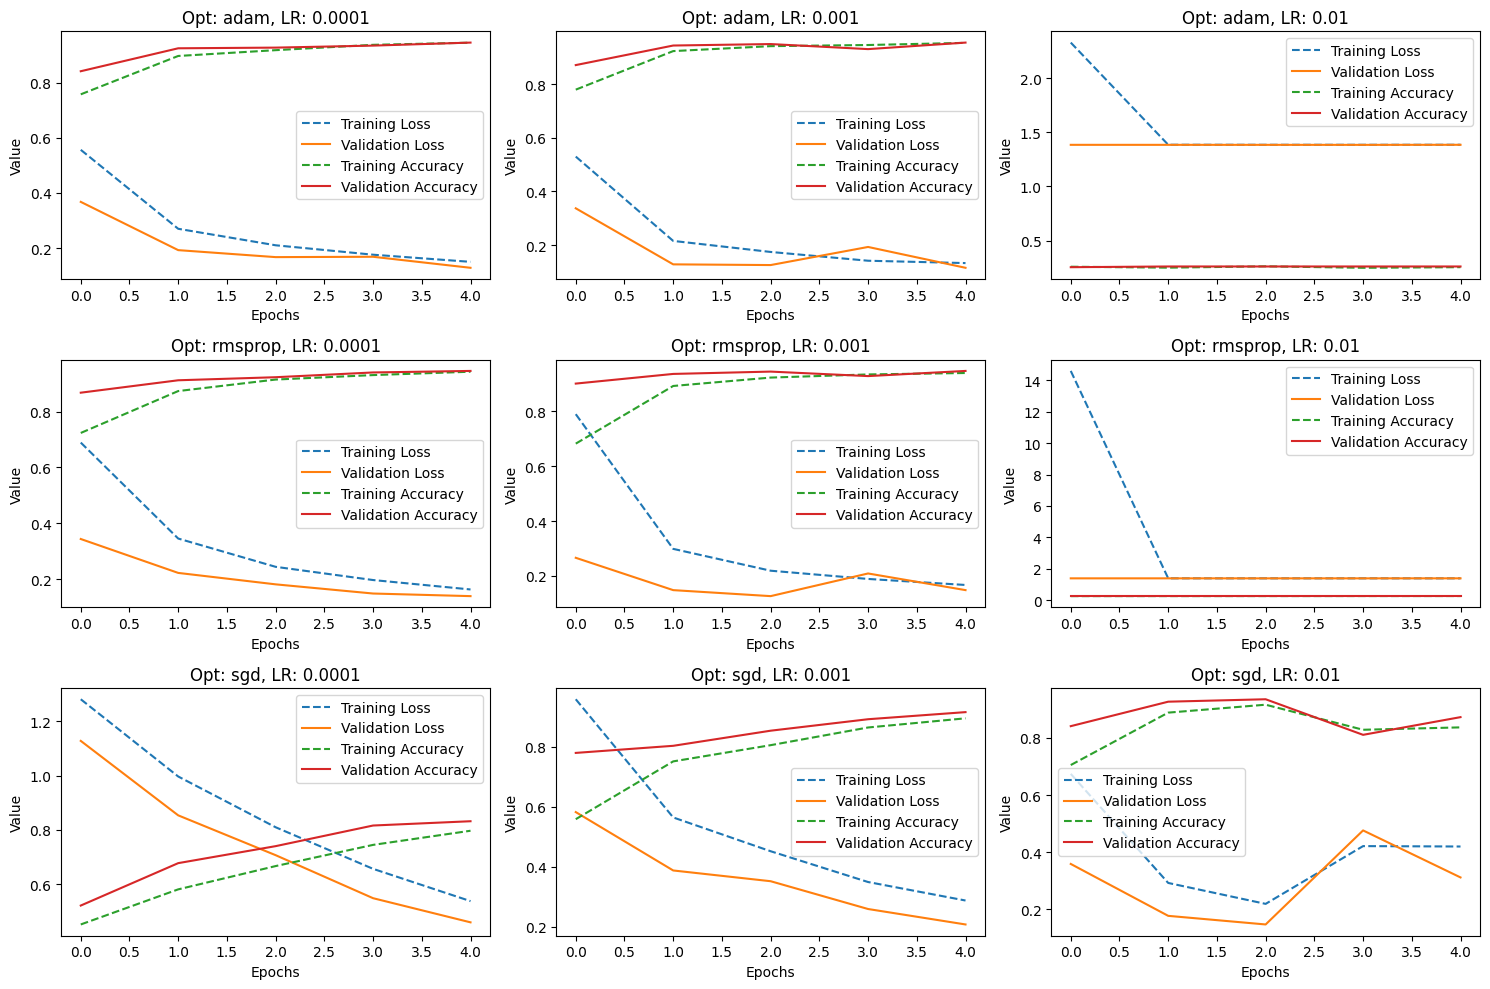

In [ ]:
# Get unique optimizers and learning rates
optimizers = sorted(set(opt for opt, _ in history_dict.keys()))
learning_rates = sorted(set(lr for _, lr in history_dict.keys()))

# Create subplots: rows for optimizers, columns for learning rates
fig, axes = plt.subplots(len(optimizers), len(learning_rates), figsize=(15, 10))

# If only one row, make axes a list of lists for consistency
if len(optimizers) == 1:
    axes = [axes]

# Iterate through optimizers and learning rates
for i, optimizer in enumerate(optimizers):
    for j, learning_rate in enumerate(learning_rates):
        history = history_dict[(optimizer, learning_rate)]
        loss = history['loss']
        val_loss = history['val_loss']
        accuracy = history['accuracy']
        val_accuracy = history['val_accuracy']

        ax1 = axes[i][j]  # Select subplot
        ax1.plot(loss, label='Training Loss', linestyle='dashed')
        ax1.plot(val_loss, label='Validation Loss')
        ax1.plot(accuracy, label='Training Accuracy', linestyle='dashed')
        ax1.plot(val_accuracy, label='Validation Accuracy')

        ax1.set_title(f'Opt: {optimizer}, LR: {learning_rate}')
        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('Value')
        ax1.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


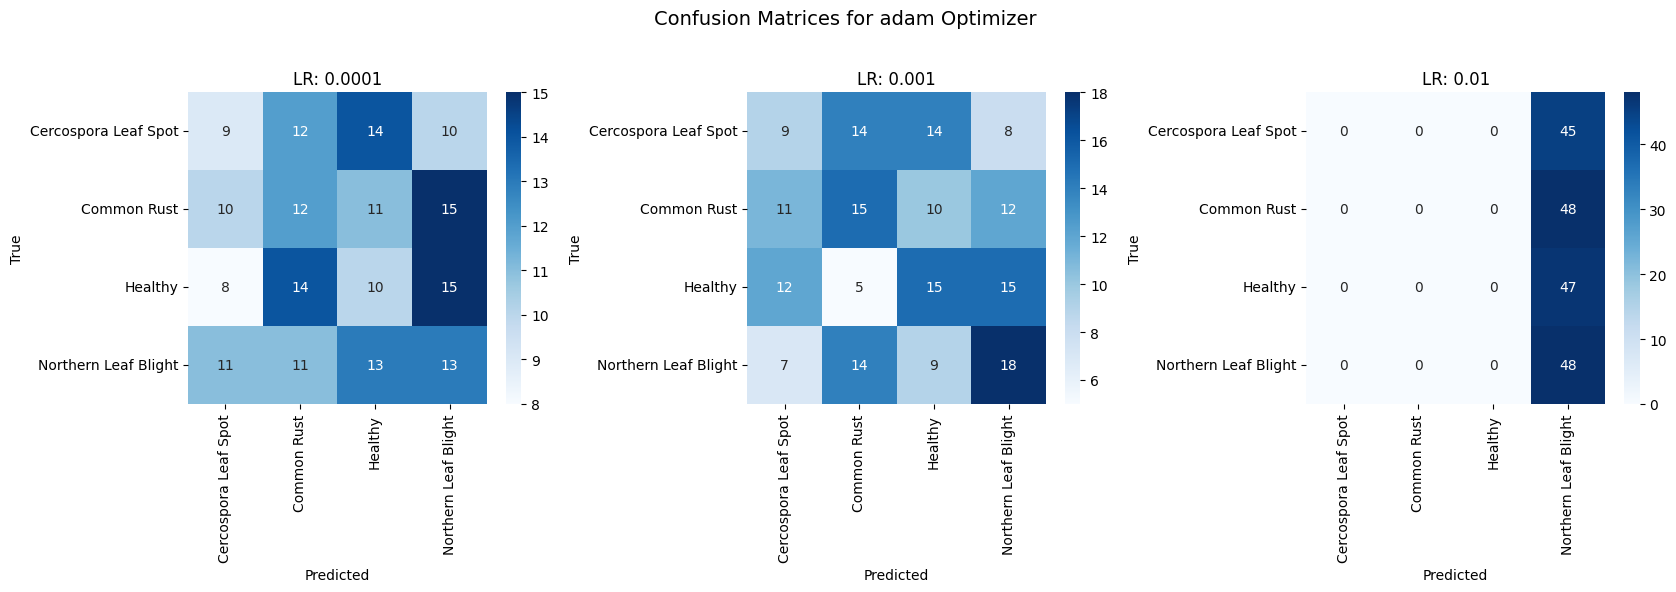

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


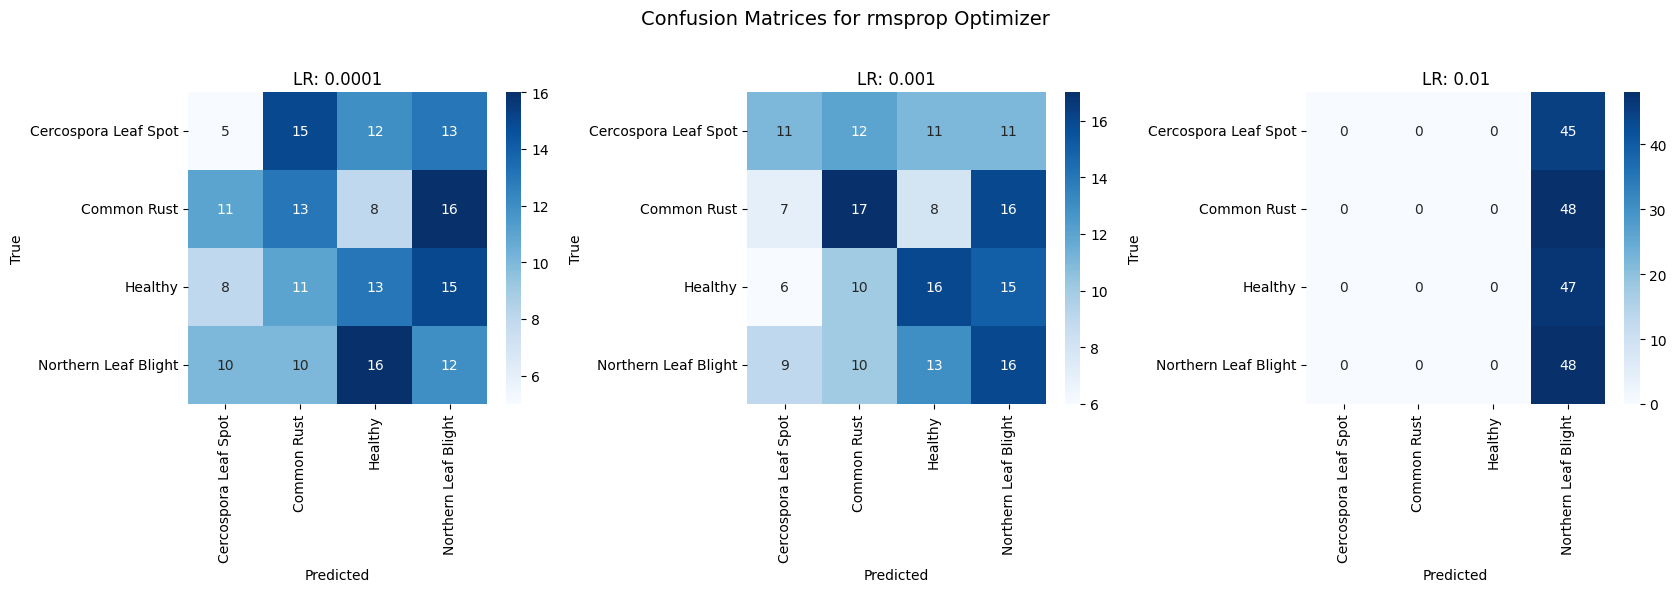

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


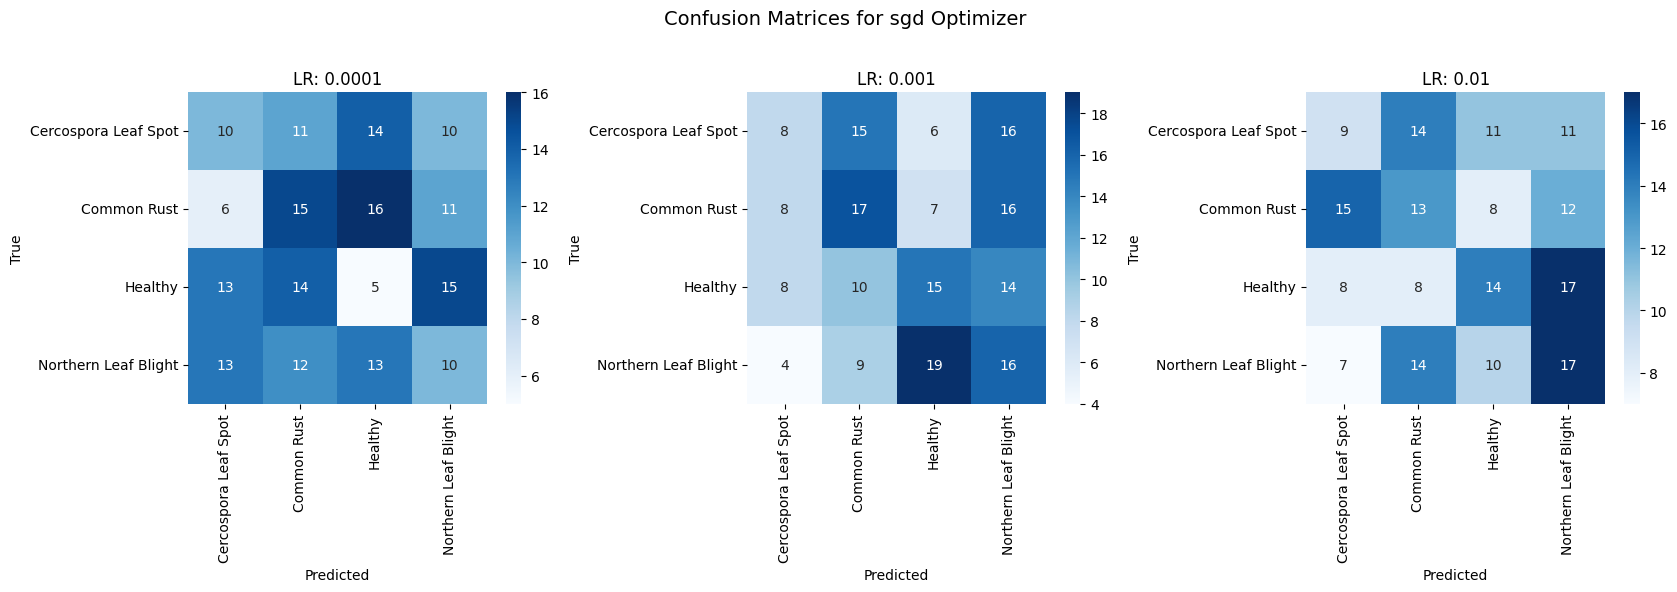

In [ ]:
classification_reports = {}

# Group results by optimizer
grouped_reports = {}

for optimizer in optimizers:
    plt.figure(figsize=(17, 6))  # Create a figure with a row of 3 plots

    for i, learning_rate in enumerate(learning_rates, 1):
        model = models_dict[(optimizer, learning_rate)]

        # Get true labels from the test generator
        y_true = test_generator.classes
        class_labels = list(test_generator.class_indices.keys())  # Class names

        # Predict using the model
        y_pred_probs = model.predict(test_generator)  # Get probability predictions
        y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class indices

        # Confusion matrix
        cm = tf.math.confusion_matrix(y_true, y_pred_classes).numpy()

        # Classification report
        report = classification_report(y_true, y_pred_classes, target_names=class_labels, output_dict=True)
        classification_reports[(optimizer, learning_rate)] = report

        # Store results by optimizer
        if optimizer not in grouped_reports:
            grouped_reports[optimizer] = {}
        grouped_reports[optimizer][learning_rate] = report

        # Plot confusion matrix in subplot
        plt.subplot(1, 3, i)  # (rows, cols, index)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
        plt.title(f"LR: {learning_rate}")
        plt.xlabel("Predicted")
        plt.ylabel("True")

    plt.suptitle(f"Confusion Matrices for {optimizer} Optimizer", fontsize=14)  # Main title
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
    plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


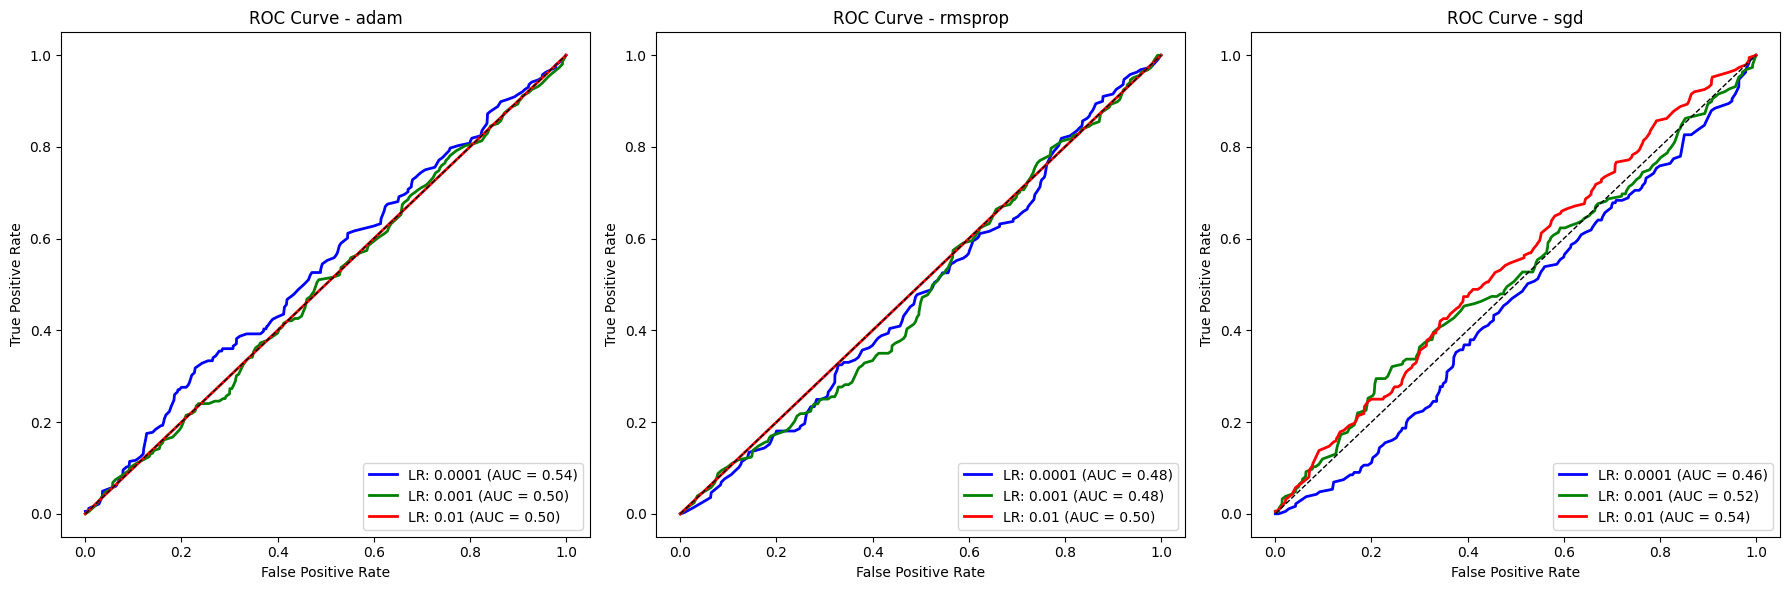

In [ ]:
num_classes = len(test_generator.class_indices)  # Number of classes
colors = ['b', 'g', 'r']
plt.figure(figsize=(18, 6))

# Convert y_true into one-hot encoding
y_true_one_hot = label_binarize(y_true, classes=np.arange(num_classes))

for idx, optimizer in enumerate(optimizers):
    plt.subplot(1, 3, idx + 1)

    for color, learning_rate in zip(colors, learning_rates):
        model = models_dict[(optimizer, learning_rate)]
        y_pred_probs = model.predict(test_generator)

        # Compute ROC curve for each class and average
        fpr, tpr, roc_auc = {}, {}, {}
        for i in range(num_classes):
            fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_pred_probs[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute macro-average ROC curve
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
        mean_tpr = np.zeros_like(all_fpr)

        for i in range(num_classes):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

        mean_tpr /= num_classes  # Average across all classes
        macro_auc = auc(all_fpr, mean_tpr)

        # Plot the macro-average ROC curve
        plt.plot(all_fpr, mean_tpr, color=color, lw=2, label=f"LR: {learning_rate} (AUC = {macro_auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {optimizer}")
    plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

### Training with 10 Epochs

In [98]:
history_dict2 = {}
models_dict2 = {}

for optimizer in optimizers:
    for learning_rate in learning_rates:
        print(f"Training with Optimizer: {optimizer}, Learning Rate: {learning_rate}")

        # Create and train model
        model = create_model(learning_rate, optimizer)
        history = model.fit(train_generator, validation_data = val_generator, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

        # Store results
        models_dict2[(optimizer, learning_rate)] = model
        history_dict2[(optimizer, learning_rate)] = history.history

        # Print final results
        print(f"Final Training Loss: {history.history['loss'][-1]:.4f}, Accuracy: {history.history['accuracy'][-1]:.4f}")
        print("------------------------------------------------------")


Training with Optimizer: adam, Learning Rate: 0.0001
Epoch 1/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 26s 99ms/step - accuracy: 0.6449 - loss: 0.8212 - val_accuracy: 0.9125 - val_loss: 0.2415
Epoch 2/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - accuracy: 0.8963 - loss: 0.2747 - val_accuracy: 0.9106 - val_loss: 0.2116
Epoch 3/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9209 - loss: 0.2078 - val_accuracy: 0.9410 - val_loss: 0.1378
Epoch 4/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.9508 - loss: 0.1454 - val_accuracy: 0.9459 - val_loss: 0.1455
Epoch 5/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.9568 - loss: 0.1304 - val_accuracy: 0.9471 - val_loss: 0.1285
Epoch 6/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.9555 - loss: 0.1247 - val_accuracy: 0.9453 - val_loss: 0.1259
Epoch 7/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.9603 - loss: 0.1177 - val_accuracy: 0.9477 - val_loss: 0.1220
Epoch 8/10
229/229 ━━━━━━━━━━━━━━━━━━

In [99]:
print("\nTest Accuracy for all model with 10 epochs:\n")

test_accuracies = {}

for optimizer in optimizers:
    for learning_rate in learning_rates:
        model = models_dict[(optimizer, learning_rate)]
        loss, accuracy = model.evaluate(test_generator, verbose=1)
        test_accuracies[(optimizer, learning_rate)] = accuracy

print("\nSummary of Test Accuracies:")
# Column headers
print(f"{'Optimizer':<10} | {'Learning Rate':<12} | {'Test Accuracy':<10}")
print("-" * 40)

# Print each optimizer's results
for optimizer in optimizers:
    for learning_rate in learning_rates:
        accuracy = test_accuracies[(optimizer, learning_rate)]
        print(f"{optimizer:<10} | {learning_rate:<12} | {accuracy:.4f}")


Test Accuracy for all model with 10 epochs:

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9422 - loss: 0.2858
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9337 - loss: 2.5491
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2587 - loss: 1.3863
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9275 - loss: 0.3717
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9563 - loss: 0.4692
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9100 - loss: 0.9715
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8178 - loss: 0.4355
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9505 - loss: 0.1759
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9192 - loss: 0.5415

Summary of Test Accuracies:
Optimizer  | Learning Rate | Test Accuracy
----------------------------------------
adam       | 0.0001       | 0.9202
adam       | 0.001        | 0.9415
adam       | 0.01         | 0.2553
rmsprop    | 0.0001       | 0.9468
rmsprop    | 0.001        | 0.9468
rmsprop    | 0.01 

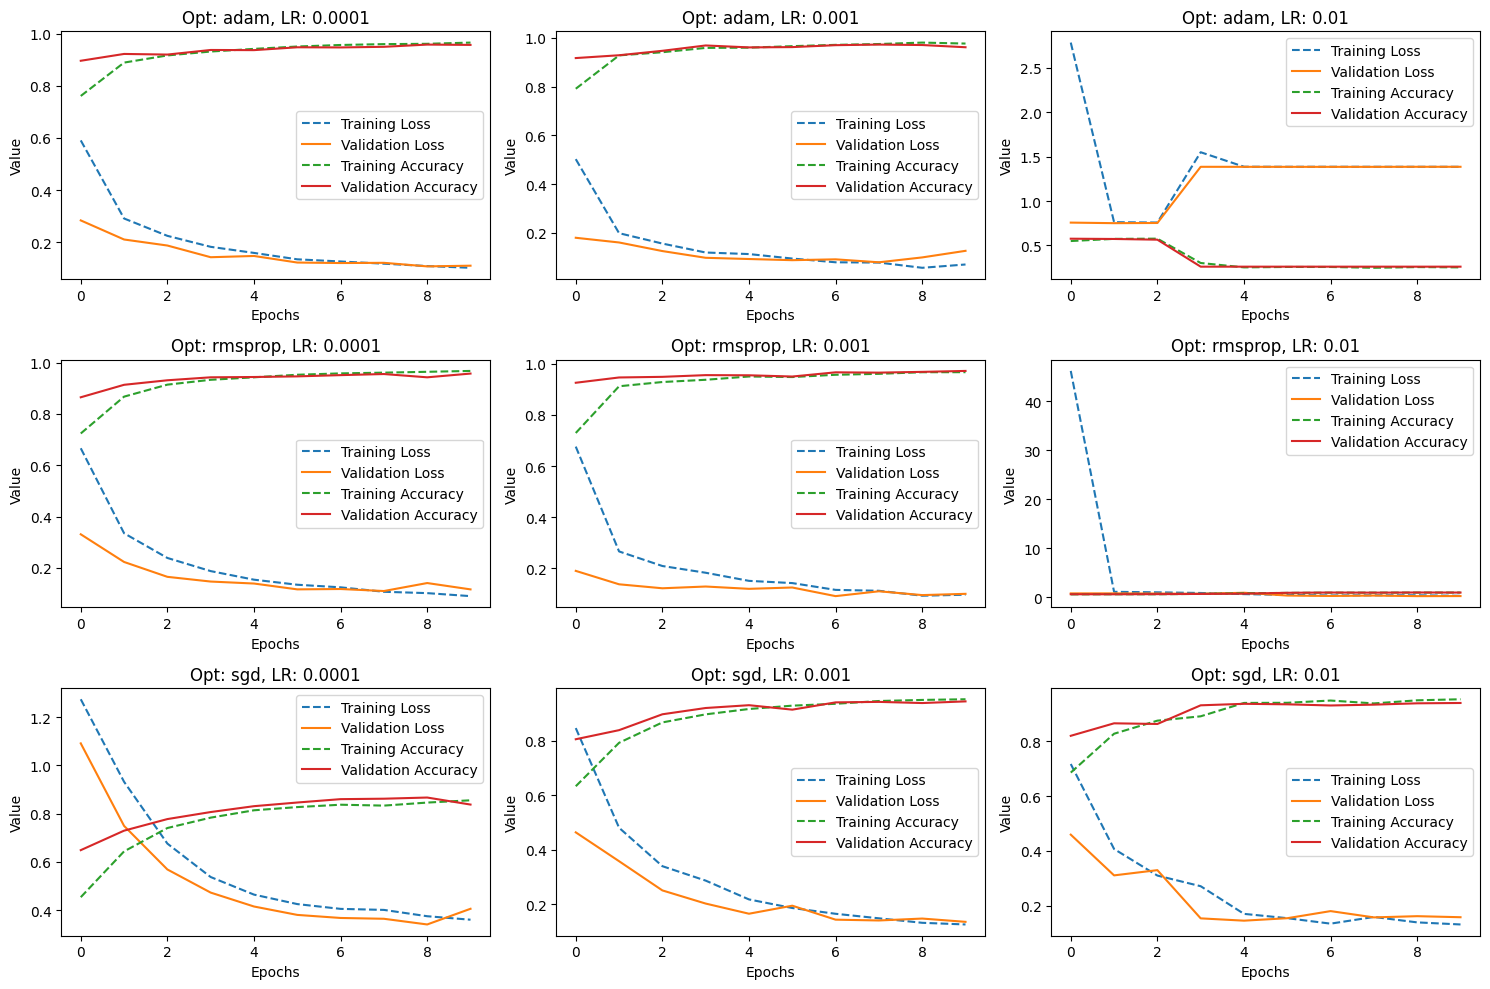

In [100]:
# Get unique optimizers and learning rates
optimizers = sorted(set(opt for opt, _ in history_dict2.keys()))
learning_rates = sorted(set(lr for _, lr in history_dict2.keys()))

# Create subplots: rows for optimizers, columns for learning rates
fig, axes = plt.subplots(len(optimizers), len(learning_rates), figsize=(15, 10))

# If only one row, make axes a list of lists for consistency
if len(optimizers) == 1:
    axes = [axes]

# Iterate through optimizers and learning rates
for i, optimizer in enumerate(optimizers):
    for j, learning_rate in enumerate(learning_rates):
        history = history_dict[(optimizer, learning_rate)]
        loss = history['loss']
        val_loss = history['val_loss']
        accuracy = history['accuracy']
        val_accuracy = history['val_accuracy']

        ax1 = axes[i][j]  # Select subplot
        ax1.plot(loss, label='Training Loss', linestyle='dashed')
        ax1.plot(val_loss, label='Validation Loss')
        ax1.plot(accuracy, label='Training Accuracy', linestyle='dashed')
        ax1.plot(val_accuracy, label='Validation Accuracy')

        ax1.set_title(f'Opt: {optimizer}, LR: {learning_rate}')
        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('Value')
        ax1.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


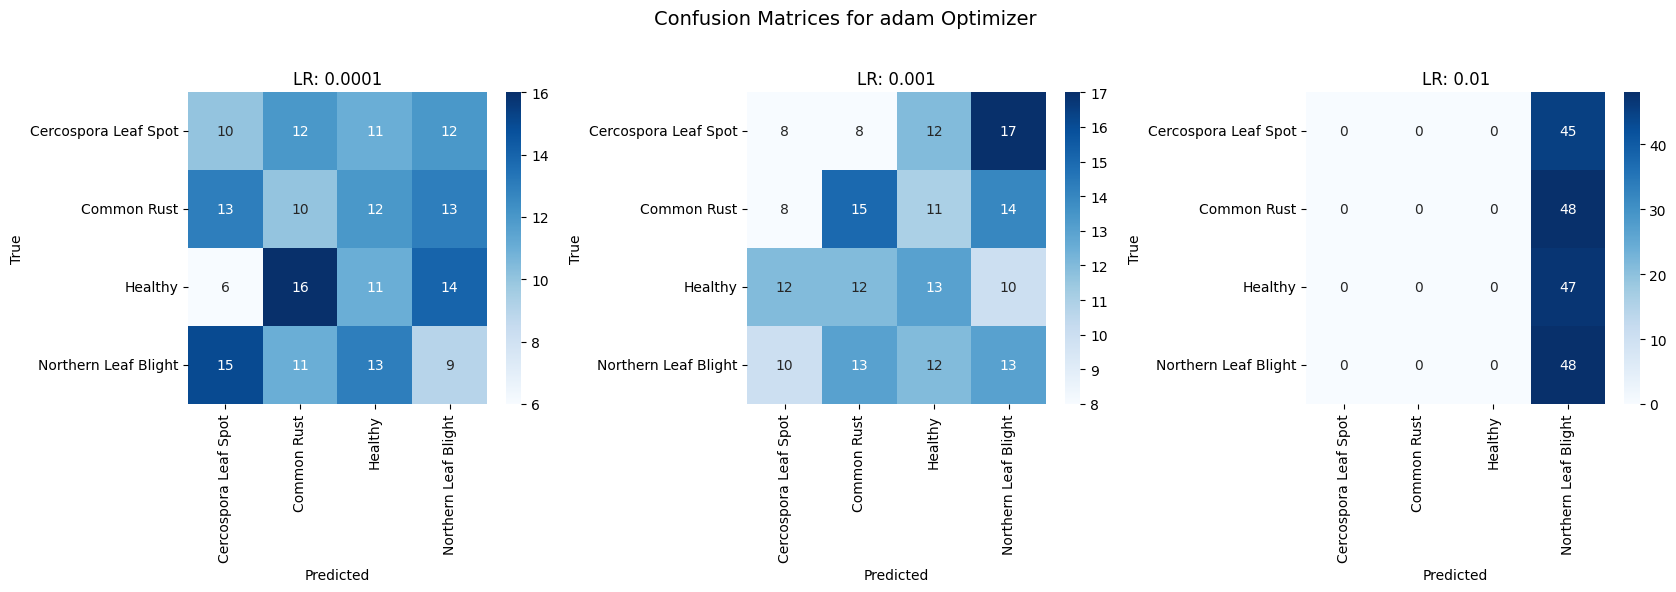

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


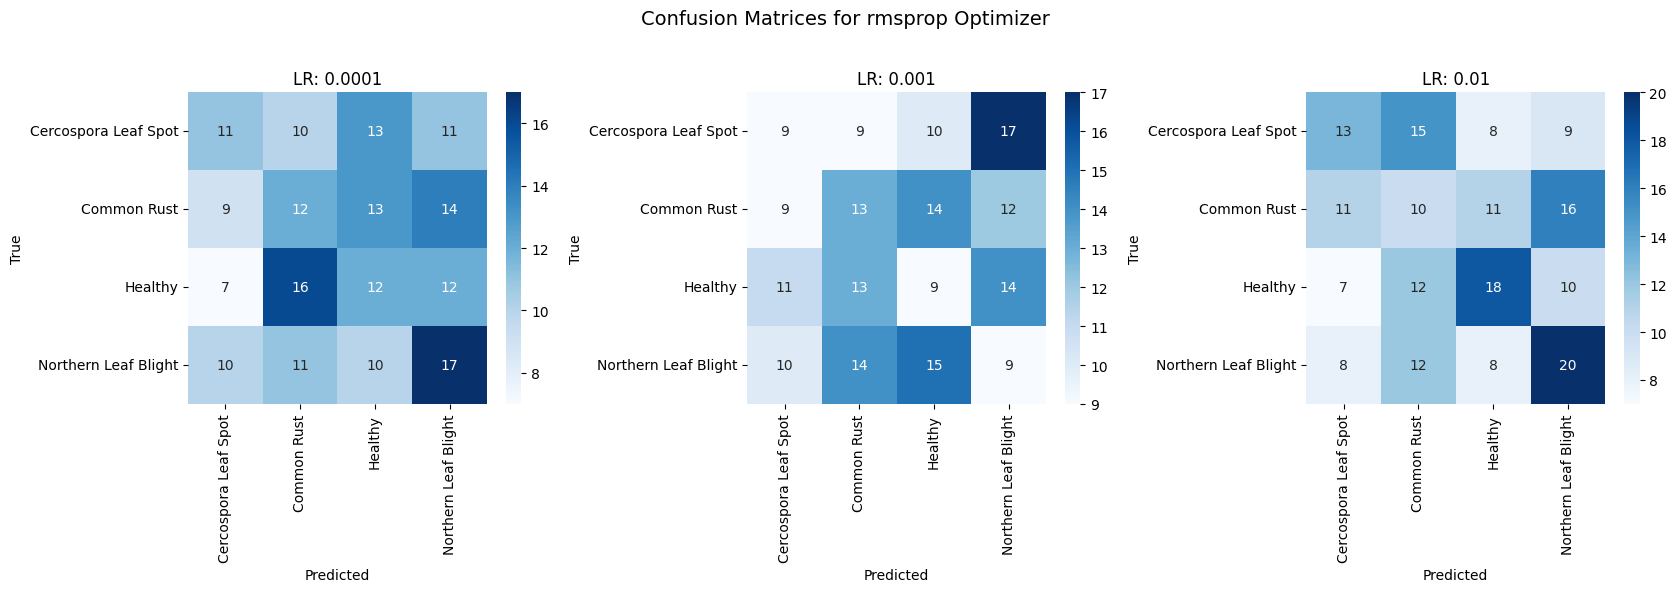

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


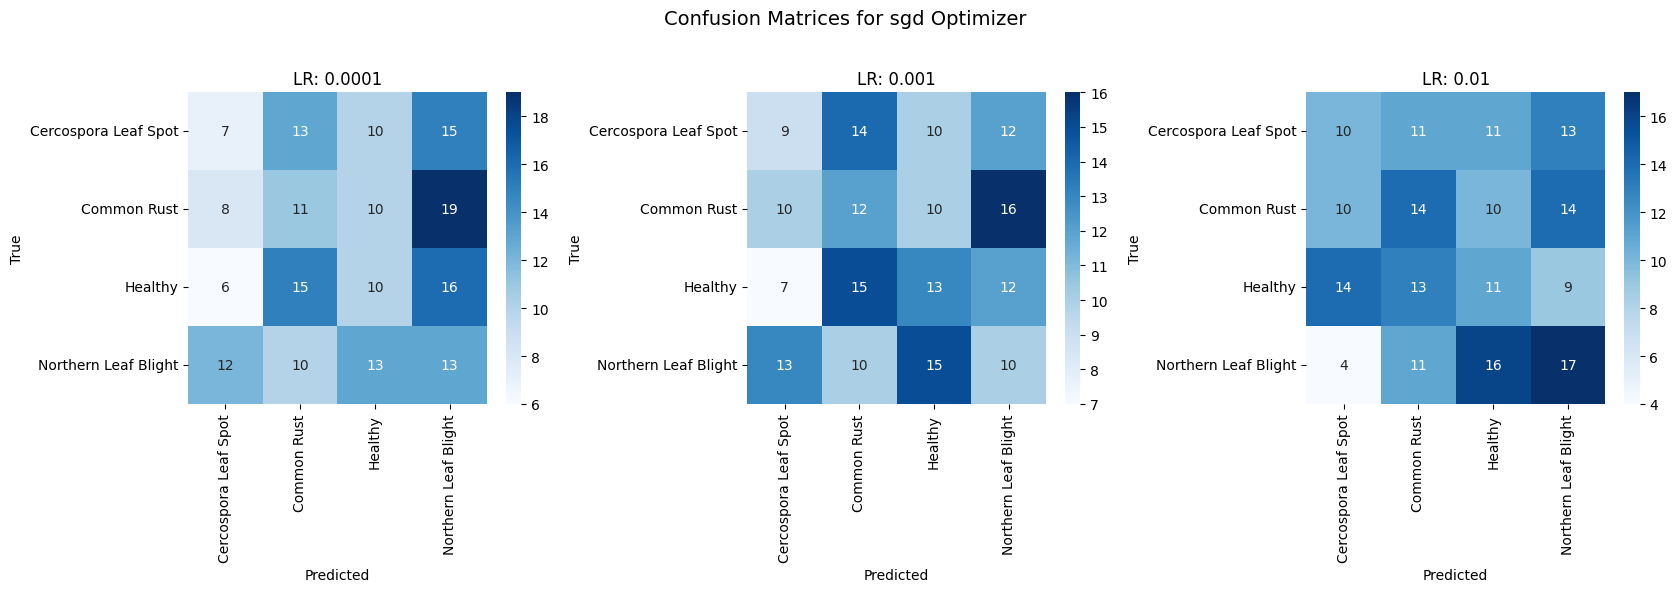

In [101]:
classification_reports = {}

# Group results by optimizer
grouped_reports = {}

for optimizer in optimizers:
    plt.figure(figsize=(17, 6))  # Create a figure with a row of 3 plots

    for i, learning_rate in enumerate(learning_rates, 1):
        model = models_dict[(optimizer, learning_rate)]

        # Get true labels from the test generator
        y_true = test_generator.classes
        class_labels = list(test_generator.class_indices.keys())  # Class names

        # Predict using the model
        y_pred_probs = model.predict(test_generator)  # Get probability predictions
        y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class indices

        # Confusion matrix
        cm = tf.math.confusion_matrix(y_true, y_pred_classes).numpy()

        # Classification report
        report = classification_report(y_true, y_pred_classes, target_names=class_labels, output_dict=True)
        classification_reports[(optimizer, learning_rate)] = report

        # Store results by optimizer
        if optimizer not in grouped_reports:
            grouped_reports[optimizer] = {}
        grouped_reports[optimizer][learning_rate] = report

        # Plot confusion matrix in subplot
        plt.subplot(1, 3, i)  # (rows, cols, index)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
        plt.title(f"LR: {learning_rate}")
        plt.xlabel("Predicted")
        plt.ylabel("True")

    plt.suptitle(f"Confusion Matrices for {optimizer} Optimizer", fontsize=14)  # Main title
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
    plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


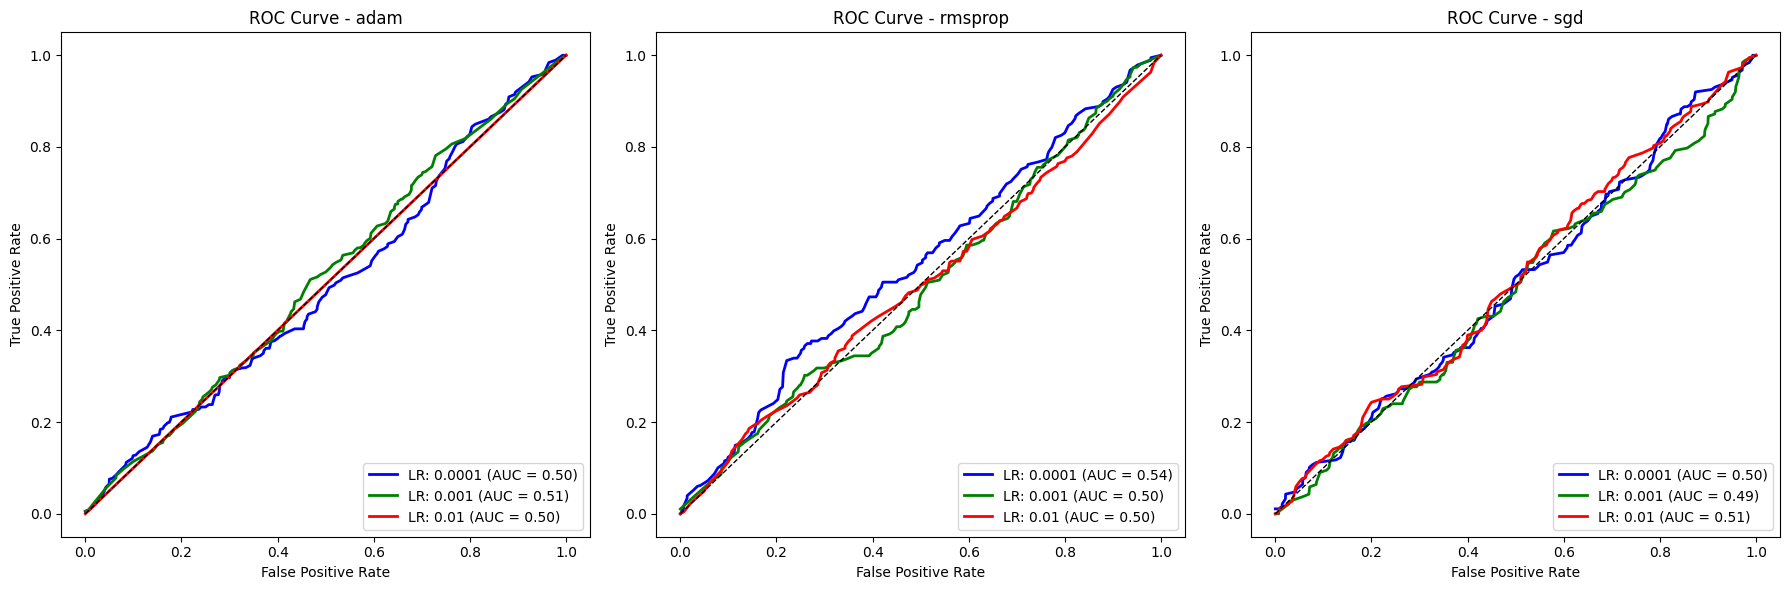

In [102]:
num_classes = len(test_generator.class_indices)  # Number of classes
colors = ['b', 'g', 'r']
plt.figure(figsize=(18, 6))

# Convert y_true into one-hot encoding
y_true_one_hot = label_binarize(y_true, classes=np.arange(num_classes))

for idx, optimizer in enumerate(optimizers):
    plt.subplot(1, 3, idx + 1)

    for color, learning_rate in zip(colors, learning_rates):
        model = models_dict[(optimizer, learning_rate)]
        y_pred_probs = model.predict(test_generator)

        # Compute ROC curve for each class and average
        fpr, tpr, roc_auc = {}, {}, {}
        for i in range(num_classes):
            fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_pred_probs[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute macro-average ROC curve
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
        mean_tpr = np.zeros_like(all_fpr)

        for i in range(num_classes):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

        mean_tpr /= num_classes  # Average across all classes
        macro_auc = auc(all_fpr, mean_tpr)

        # Plot the macro-average ROC curve
        plt.plot(all_fpr, mean_tpr, color=color, lw=2, label=f"LR: {learning_rate} (AUC = {macro_auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {optimizer}")
    plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

---

### Training with 15 epochs

In [ ]:
history_dict3 = {}
models_dict3 = {}

for optimizer in optimizers:
    for learning_rate in learning_rates:
        print(f"Training with Optimizer: {optimizer}, Learning Rate: {learning_rate}")

        # Create and train model
        model = create_model(learning_rate, optimizer)
        history = model.fit(train_generator, validation_data = val_generator, epochs=12, batch_size=32, validation_split=0.2, verbose=1)

        # Store results
        models_dict[(optimizer, learning_rate)] = model
        history_dict[(optimizer, learning_rate)] = history.history

        # Print final results
        print(f"Final Training Loss: {history.history['loss'][-1]:.4f}, Accuracy: {history.history['accuracy'][-1]:.4f}")
        print("------------------------------------------------------")


In [ ]:
# Get unique optimizers and learning rates
optimizers = sorted(set(opt for opt, _ in history_dict3.keys()))
learning_rates = sorted(set(lr for _, lr in history_dict3.keys()))

# Create subplots: rows for optimizers, columns for learning rates
fig, axes = plt.subplots(len(optimizers), len(learning_rates), figsize=(15, 10))

# If only one row, make axes a list of lists for consistency
if len(optimizers) == 1:
    axes = [axes]

# Iterate through optimizers and learning rates
for i, optimizer in enumerate(optimizers):
    for j, learning_rate in enumerate(learning_rates):
        history = history_dict[(optimizer, learning_rate)]
        loss = history['loss']
        val_loss = history['val_loss']
        accuracy = history['accuracy']
        val_accuracy = history['val_accuracy']

        ax1 = axes[i][j]  # Select subplot
        ax1.plot(loss, label='Training Loss', linestyle='dashed')
        ax1.plot(val_loss, label='Validation Loss')
        ax1.plot(accuracy, label='Training Accuracy', linestyle='dashed')
        ax1.plot(val_accuracy, label='Validation Accuracy')

        ax1.set_title(f'Opt: {optimizer}, LR: {learning_rate}')
        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('Value')
        ax1.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()